## Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import XGBRegressor

## Data preprocessing

In [5]:
house_price_dataset = pd.read_csv("Boston Dataset.csv")
house_price_dataset.drop(columns=['Unnamed: 0'], axis=0, inplace=True) # This was an unwanted column
house_price_dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
house_price_dataset.shape

(506, 14)

In [9]:
# Check for missing values
print(house_price_dataset.isna().sum())
# print(house_price_dataset.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


In [50]:
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.448432,0.130270,11.136779,0.069170,0.554695,0.538796,68.574901,3.795043,9.549407,0.422208,18.455534,0.910637,12.653063,22.532806
std,0.226336,0.253876,6.860353,0.253994,0.115878,0.046413,28.148861,2.105710,8.707259,0.321636,2.164946,0.219003,7.141062,9.197104
min,0.000000,0.000000,0.460000,0.000000,0.385000,0.340451,2.900000,1.129600,1.000000,0.000000,12.600000,0.000000,1.730000,5.000000
25%,0.268367,0.000000,5.190000,0.000000,0.449000,0.513021,45.025000,2.100175,4.000000,0.175573,17.400000,0.960298,6.950000,17.025000
50%,0.387692,0.000000,9.690000,0.000000,0.538000,0.534807,77.500000,3.207450,5.000000,0.272901,19.050000,0.990031,11.360000,21.200000
75%,0.666445,0.169925,18.100000,0.000000,0.624000,0.562118,94.075000,5.188425,24.000000,0.914122,20.200000,0.998771,16.955000,25.000000
max,1.000000,1.000000,27.740000,1.000000,0.871000,0.693147,100.000000,12.126500,24.000000,1.000000,22.000000,1.000000,37.970000,50.000000


## EDA

In [58]:
# creating box plot for outlier detection
def create_box_plot(panda_df):
    fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
    index = 0
    ax = ax.flatten()
    for col, value in panda_df.items():
        sns.boxplot(y=col, data=panda_df, ax=ax[index])
        index += 1
    plt.tight_layout(pad=0.3, w_pad=0.5, h_pad=3.0)

# create dist plot
def create_dist_plot(pandas_df):
    fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
    index = 0
    ax = ax.flatten()

    for col, value in pandas_df.items():
        sns.histplot(value, ax=ax[index])
        index += 1
    plt.tight_layout(pad=0.3, w_pad=0.5, h_pad=3.0)

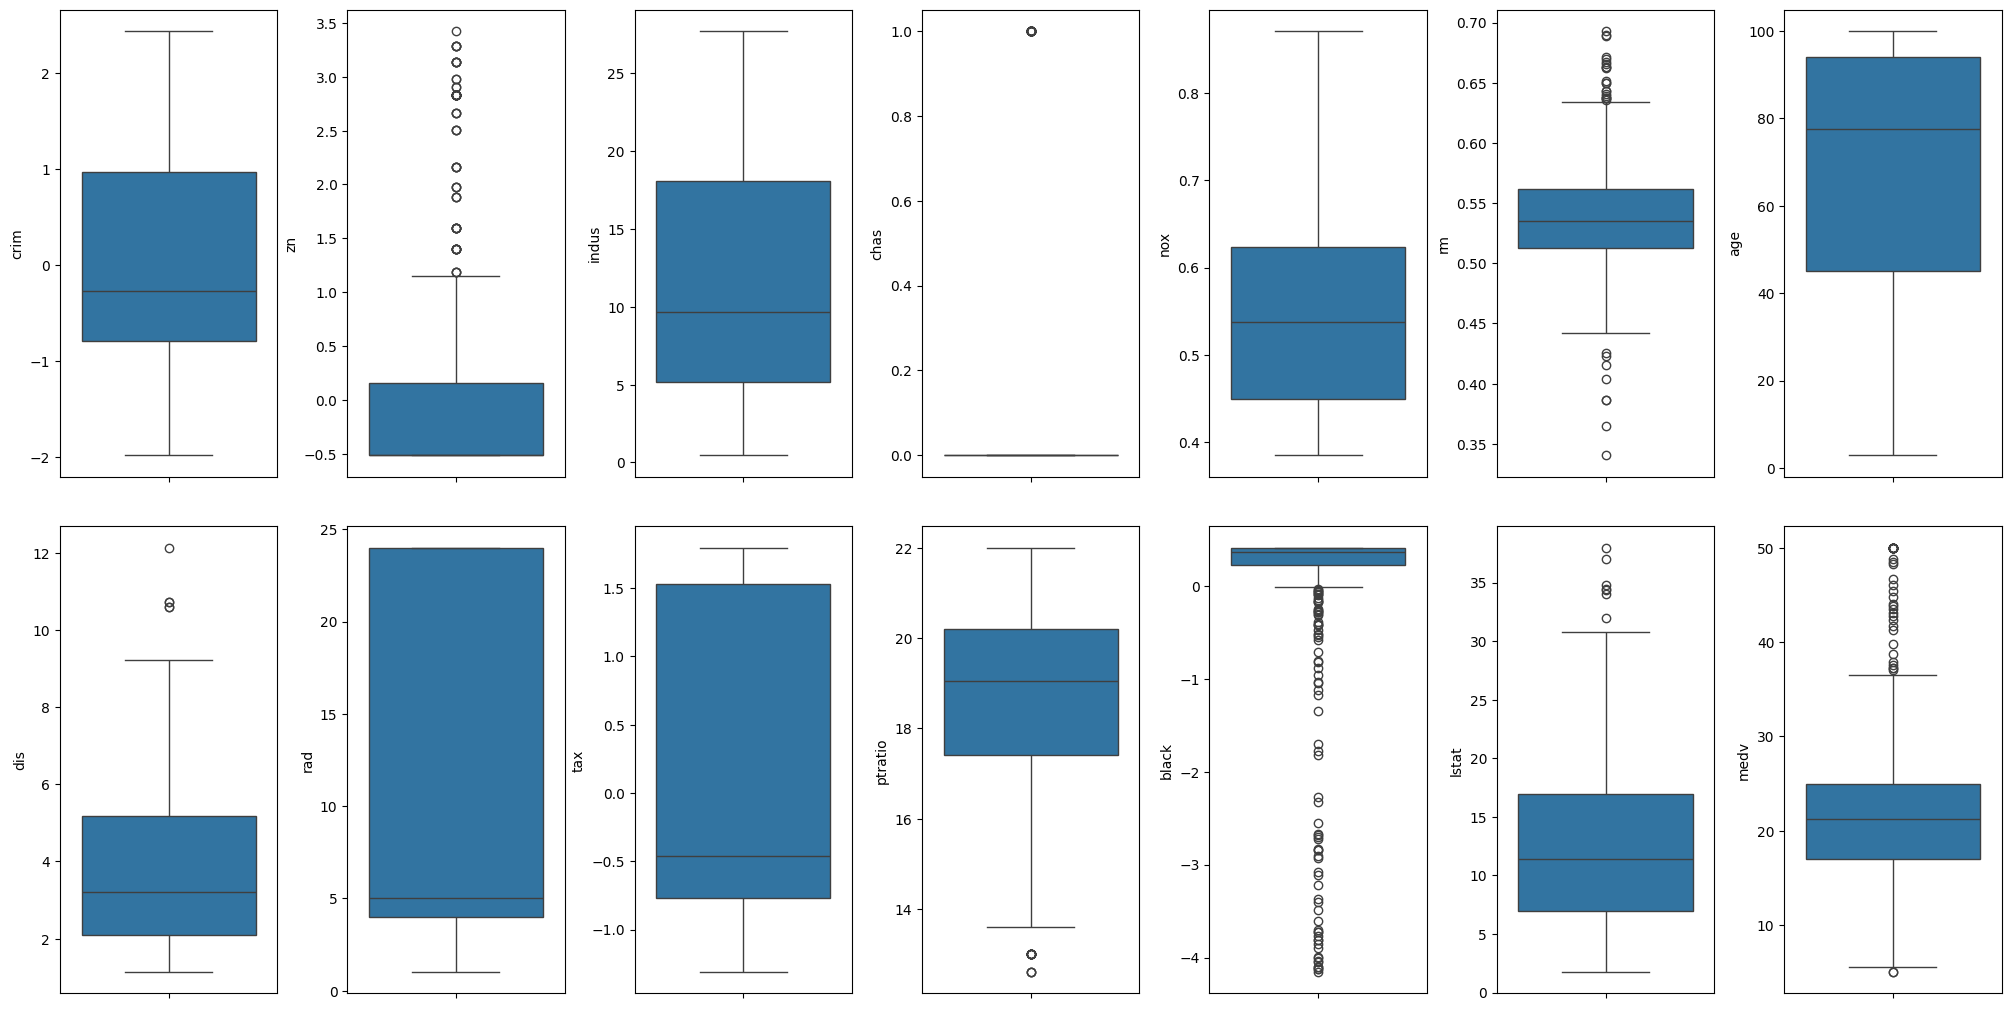

In [59]:
create_box_plot(house_price_dataset)

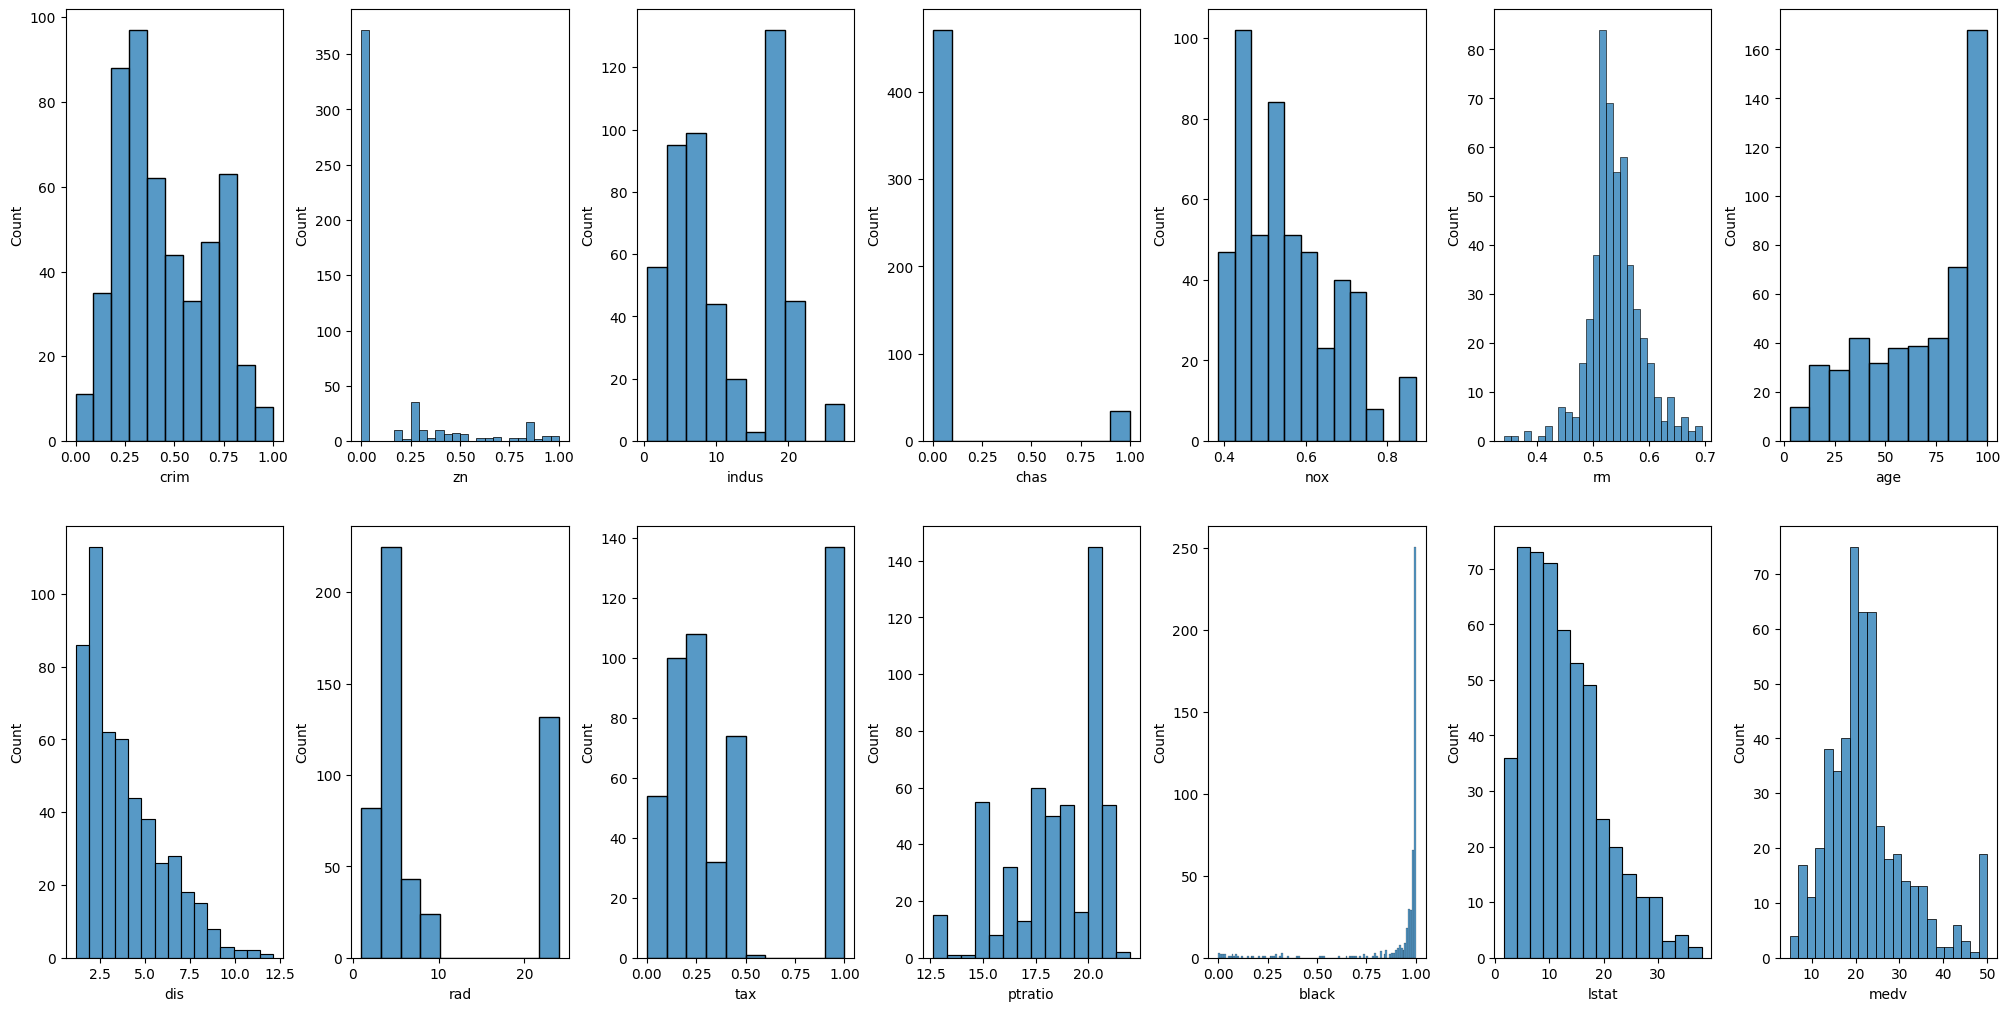

In [63]:
create_dist_plot(house_price_dataset)

In [64]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(house_price_dataset[col])
    maximum = max(house_price_dataset[col])
    house_price_dataset[col] = (house_price_dataset[col] - minimum) / (maximum - minimum)

In [66]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(house_price_dataset[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-1.983228,0.427865,-0.666608,0.408447
1,-1.305639,-0.513632,-0.987329,0.408447
2,-1.305978,-0.513632,-0.987329,0.374511
3,-1.226942,-0.513632,-1.106115,0.389541
4,-0.876187,-0.513632,-1.106115,0.408447


In [68]:
for col in cols:
    house_price_dataset[col] = scaled_cols[col]

In [73]:
# create_dist_plot(house_price_dataset)
# create_box_plot(house_price_dataset)

In [70]:
correlation = house_price_dataset.corr()

<Axes: >

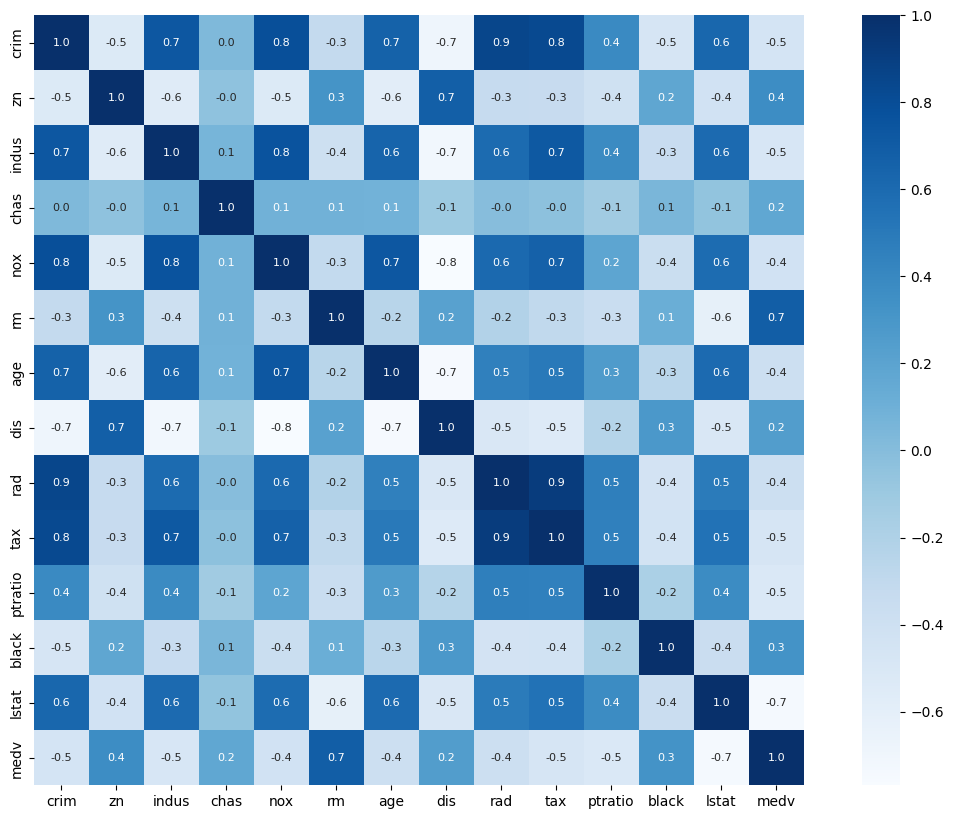

In [71]:
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(15,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [72]:
X = house_price_dataset.drop(['medv'], axis=1)
Y = house_price_dataset['medv']
X.shape, Y.shape

((506, 13), (506,))

## Training

In [79]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

## XGBoost

Model Report
MSE: 10.518449543255217
CV Score: 25.971505305189755


<Axes: title={'center': 'Feature Importance'}>

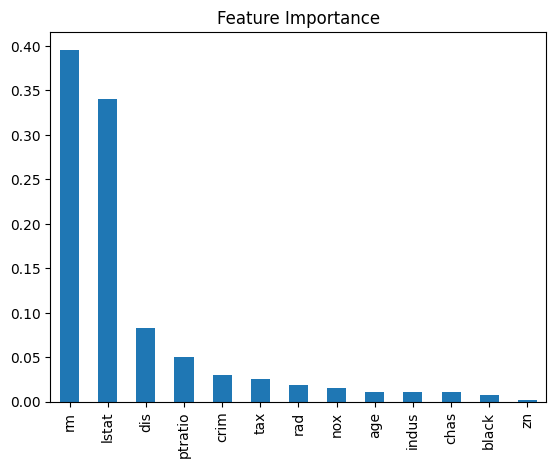

In [82]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, Y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')